In [32]:
import csv
import pandas as pd
import numpy as np
import json
import datetime
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("by_org_results (3).csv", delimiter=";")

In [34]:
# allowed_orgs = [
# "figurerobotics",
# "1x-technologies",
# "unitreerobotics",
# "boston-dynamics",
# "agilityrobotics",
# "pollen-robotics",
# ]

In [35]:
# df = df[df["organization"].isin(allowed_orgs)]

In [ ]:
with open("by_repo_results (3).csv", "r", encoding='utf-8') as f:
  csvreader = csv.reader(f, delimiter=";")
  headers = next(csvreader)
  data = []
  for row in csvreader:
    if row[0] != " ":
      company_name = row[0]
    else:
      # if company_name in allowed_orgs:
        # print(row)
        row[0] = company_name
        data.append(row)

In [37]:
repo_df = pd.DataFrame(data=data, columns=headers)
repo_df["repo_stars"] = repo_df["repo_stars"].astype(np.int32)

In [38]:
repo_df

,organization,description,twitter_link,repo_name,repo_stars,repo_topics,repo_languages,repo_half_year_commits,repo_last_commit_date
0,ros-acceleration,,,community,60,"['cpu', 'fpga', 'gpu', 'hardware', 'hardware-a...","('%',)",0,2024-01-04T09:54:23Z
1,ros-acceleration,,,ament_vitis,7,[],"('CMake: 100.0%',)",0,2023-08-14T09:36:49Z
2,ros-acceleration,,,acceleration_firmware_kv260,10,"['acceleration', 'fpga', 'hardware', 'hardware...","('CMake: 100.0%',)",0,2022-11-09T11:32:38Z
3,ros-acceleration,,,acceleration_firmware,0,[],"('CMake: 100.0%',)",0,2021-09-09T08:17:35Z
4,ros-acceleration,,,acceleration_examples,41,"['fpga', 'gpu', 'hardware-acceleration', 'ros2']","('C++: 48.70051274748906%, Python: 40.05005593...",0,2023-10-25T12:24:05Z
...,...,...,...,...,...,...,...,...,...
8514,4am-robotics,,,pointcloud_to_laserscan,3,[],"('C++: 96.39305870157791%, CMake: 3.6069412984...",4,2024-08-05T08:01:31Z
8515,4am-robotics,,,cob_fiducials,0,[],"('C++: 95.3782530131704%, C: 3.408406450451121...",0,2024-03-18T09:08:23Z
8516,4am-robotics,,,robmuxinator,7,"['robotics', 'tmux', 'tools']","('Python: 96.42264429282685%, Nix: 3.577355707...",36,2024-11-05T11:50:22Z
8517,4am-robotics,,,cob_fiducials-release,0,[],"('%',)",0,2024-02-20T09:29:25Z


In [78]:

print(repo_df[repo_df['repo_stars'] == 0])
#print(repo_df['repo_stars'].max())
#print(df[df['stars_count'] != 0].sort_values(by='stars_count').head(10))


          organization description twitter_link                     repo_name  \
3     ros-acceleration                                  acceleration_firmware   
5     ros-acceleration                                       ros2acceleration   
6     ros-acceleration                           acceleration_firmware_zcu102   
7     ros-acceleration                                           vitis_common   
8     ros-acceleration                                tracetools_acceleration   
...                ...         ...          ...                           ...   
8511      4am-robotics                              cob_command_tools-release   
8513      4am-robotics                                    cob_control-release   
8515      4am-robotics                                          cob_fiducials   
8517      4am-robotics                                  cob_fiducials-release   
8518      4am-robotics                                                vcstool   

      repo_stars           



```
# Выбран кодовый формат
```

## Группы компаний по звёздам

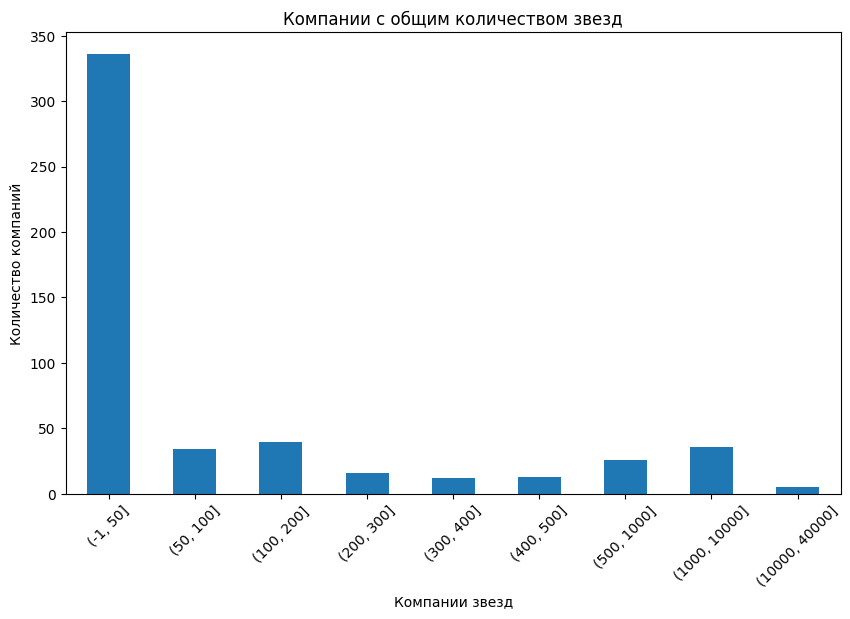

In [66]:
df.groupby(pd.cut(df["stars_count"], [-1, 50, 100, 200, 300, 400, 500, 1000, 10000, 40000]), observed=False).count()["organization"].plot(kind="bar", rot=45, title="Компании с общим количеством звезд")
plt.xlabel("Компании звезд")
plt.ylabel("Количество компаний")
None

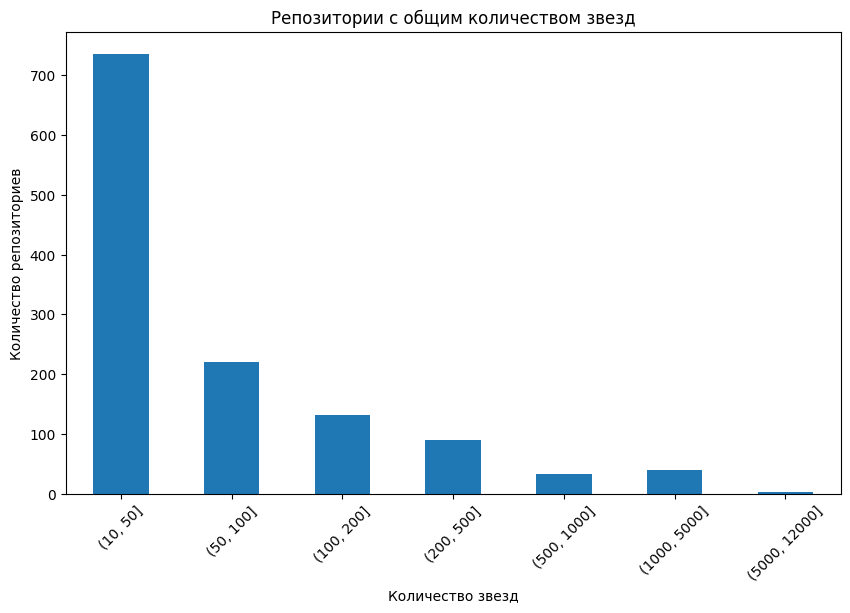

In [68]:
repo_df.groupby(pd.cut(repo_df["repo_stars"], [10, 50, 100, 200, 500, 1000, 5000, 12000]), observed=False).count()["repo_name"].plot(kind="bar", rot=45, title="Репозитории с общим количеством звезд")

plt.xlabel("Количество звезд")
plt.ylabel("Количество репозиториев")
None

## Топ-10 репозиториев по звёздам

In [41]:
repo_df[["organization", "repo_name", "repo_stars"]].sort_values(by="repo_stars", ascending=False).head(n=10).reset_index()

,index,organization,repo_name,repo_stars
0,430,apolloauto,apollo,25219
1,473,apple,turicreate,11202
2,469,apple,darwin-xnu,11009
3,742,autowarefoundation,autoware,9148
4,5157,nvidia,thrust,4922
5,466,apple,swift-protobuf,4585
6,472,apple,coremltools,4439
7,1345,canonical,lxd,4379
8,2779,fizyr,keras-retinanet,4378
9,7018,sony,sonyflake,3932


## Рейтинг языков программирования

leading_language
Scheme              1
QML                 1
Standard ML         1
V                   1
TSQL                1
VBA                 1
Witcher Script      1
XML                 1
YAML                1
nesC                1
Name: count, dtype: int64


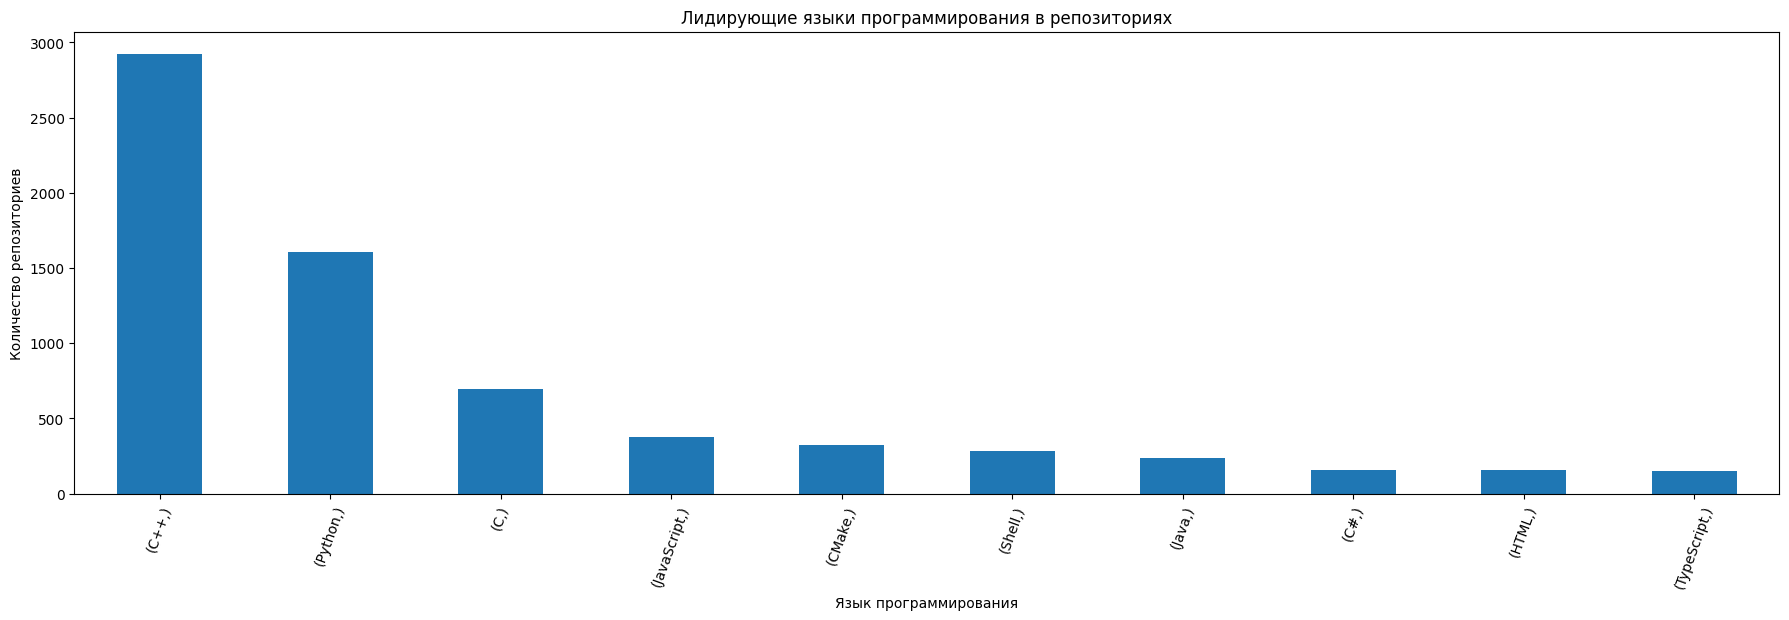

In [98]:
repo_df["leading_language"] = repo_df["repo_languages"].apply(lambda x: x[2:x.find(":")] if ":" in x else None)

repo_df[["leading_language"]].value_counts().head(10).plot.bar(rot=70, figsize=(22, 6), title="Лидирующие языки программирования в репозиториях")

plt.xlabel("Язык программирования")
plt.ylabel("Количество репозиториев")
None

print(repo_df[["leading_language"]].value_counts().sort_values(ascending=False).tail(10))

Python        4018
CMake         3956
C++           3899
C             2210
Makefile      1380
JavaScript    1018
None           781
Batchfile      502
Cuda           214
Tcl             73
dtype: int64


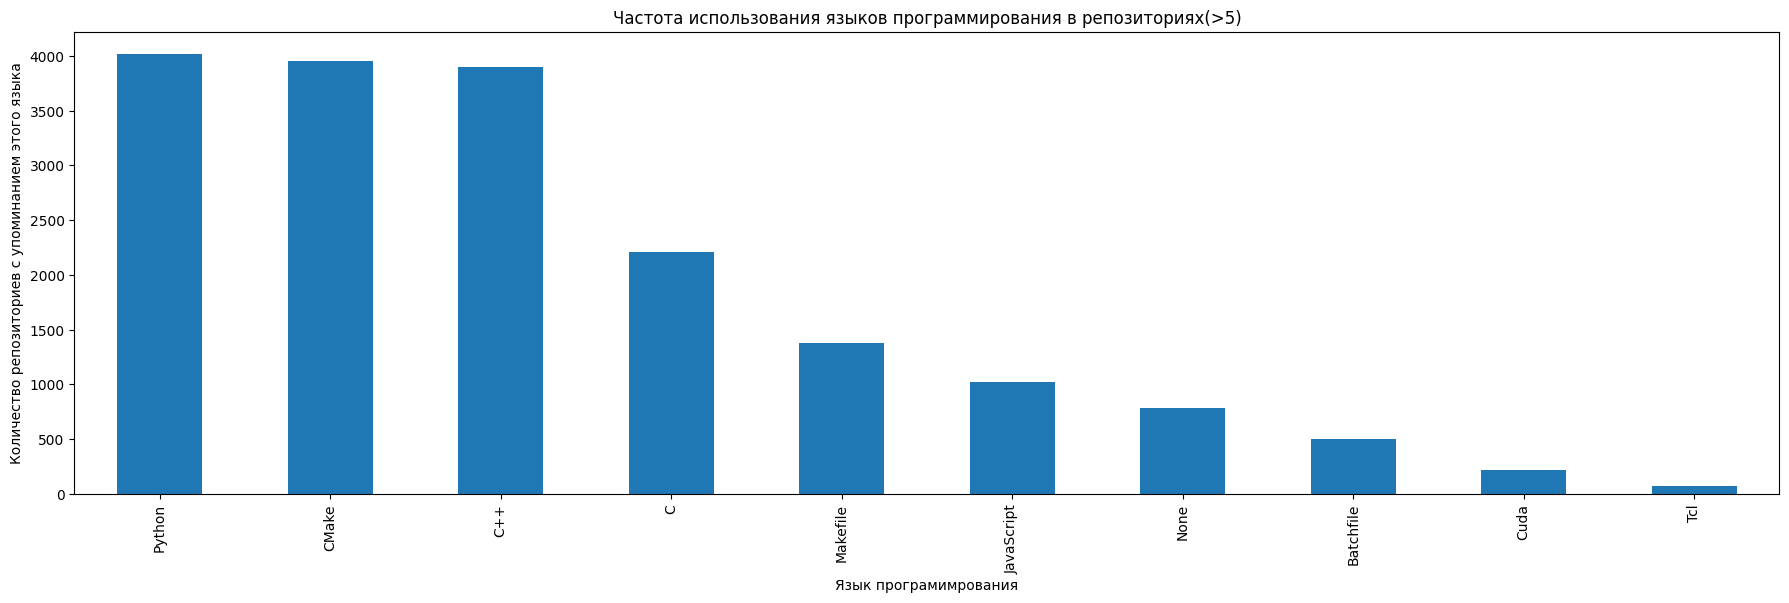

In [99]:
import collections

counter = collections.Counter([x for xs in [
    list(
        map(
            lambda x: x[:x.find(":")].strip() if ":" in x else None,
            s.replace("('", "").replace("',)", "").split(",")
            )
        ) for s in list(repo_df["repo_languages"])]
  for x in xs])

freq_series = pd.Series(dict(counter)).head(10)
freq_series[freq_series > 5].sort_values(ascending=False).plot.bar(figsize=(22, 6), title="Частота использования языков программирования в репозиториях(>5)")

plt.xlabel("Язык програмимрования")
plt.ylabel("Количество репозиториев с упоминанием этого языка")

print(freq_series[freq_series > 5].sort_values(ascending=False).head(10))

In [44]:
repo_df['repo_last_commit_date'] = pd.to_datetime(repo_df['repo_last_commit_date'])

def group_by_quarter(date):
  if date.year < 2019: # Starting from 2019
    return 'Before Start Date'
  quarter = (date.month - 1) // 3 + 1
  year = date.year
  return f"{year}Q{quarter}"

repo_df['quarter'] = repo_df['repo_last_commit_date'].apply(group_by_quarter)

language_counts_by_quarter = {}

for quarter, group in repo_df.groupby('quarter'):
  if quarter != 'Before Start Date':
    language_counts = {}
    for languages in group['repo_languages']:
      for language in [
          x[:x.find(":")].strip() if ":" in x else None
          for x in languages.replace("('", "").replace("',)", "").split(",")
      ]:
        if language:
          if language not in language_counts:
            language_counts[language] = 0
          language_counts[language] += 1
    language_counts_by_quarter[quarter] = language_counts

language_counts_df = pd.DataFrame.from_dict(language_counts_by_quarter, orient='index')
language_counts_df = language_counts_df.fillna(0).sort_index()

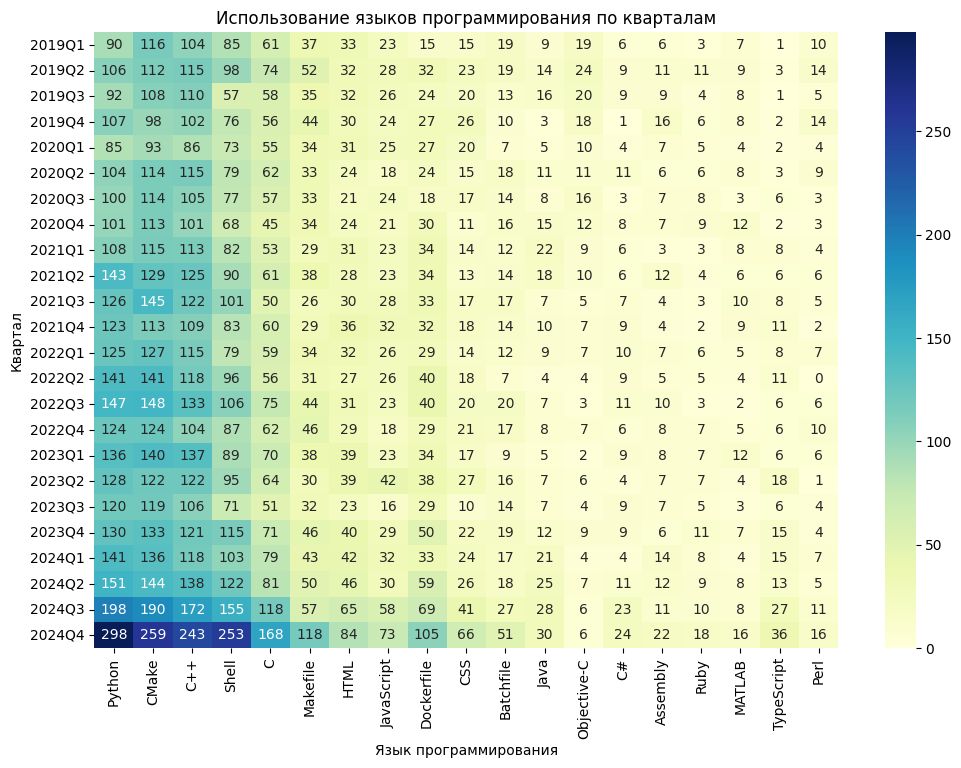

In [96]:
top_languages = freq_series[freq_series > 5].sort_values(ascending=False).head(20) #
top_languages_list = top_languages.index.to_list()
if None in top_languages_list:
  top_languages_list.remove(None)
language_counts_df[top_languages_list]


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(language_counts_df[top_languages_list], annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Использование языков программирования по кварталам")
plt.xlabel("Язык программирования")
plt.ylabel("Квартал")
plt.show()


## Облако тэгов

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

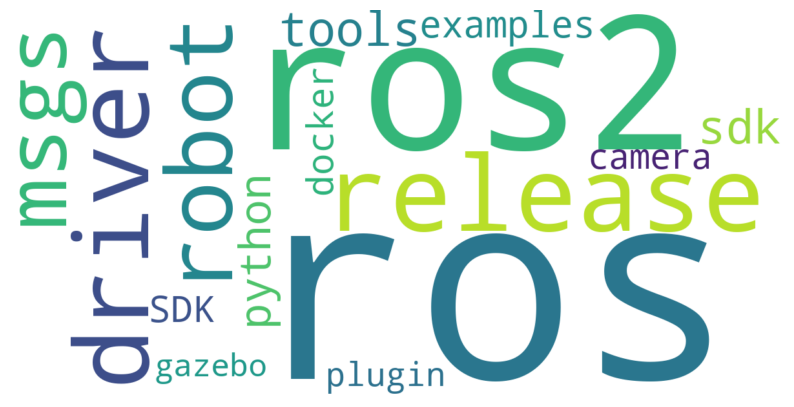

In [47]:
wc = WordCloud(
    background_color="white",
    max_words=20000,
    width=1200,
    height=600
)

words = [x for xs in [
    json.loads(x.replace("'", '"')) for x in list(df["name_parts"])]
  for x in xs]

dict_words = {}
for w in words:
  if w in dict_words:
      dict_words[w] += 1
  else:
      dict_words[w] = 1

filtered_dict = {k: dict_words[k] for k in dict_words.keys() if dict_words[k] >= 3}
limited_dict = {k: v for k, v in sorted(filtered_dict.items(), key=lambda item: item[1], reverse=True)[:15]}

# wc.generate(", ".join(filtered_words))
wc.fit_words(limited_dict)

plt.rcParams["figure.figsize"] = (10,6)
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
None

In [48]:
len(repo_df['organization'].value_counts())

436

In [49]:
{k: v for k, v in sorted(filtered_dict.items(), key=lambda item: item[1], reverse=True) if v > 10}

{'ros': 557,
 'ros2': 221,
 'release': 152,
 'driver': 145,
 'robot': 115,
 'msgs': 98,
 'tools': 92,
 'sdk': 87,
 'python': 76,
 'examples': 74,
 'docker': 71,
 'SDK': 71,
 'camera': 67,
 'plugin': 60,
 'gazebo': 56,
 'navigation': 56,
 'cpp': 55,
 'image': 54,
 'core': 53,
 'ROS': 51,
 'control': 51,
 'moveit': 51,
 'opencv': 51,
 'common': 50,
 'docs': 50,
 'module': 45,
 'zed': 43,
 'realsense': 42,
 'aws': 42,
 'client': 41,
 'sick': 41,
 'api': 41,
 'laser': 38,
 'example': 38,
 'server': 38,
 'puppet': 38,
 'doc': 37,
 'linux': 37,
 'node': 35,
 'firmware': 34,
 'meta': 34,
 'package': 34,
 'slam': 34,
 'rosdistro': 33,
 'demo': 32,
 'to': 32,
 'vision': 32,
 'autoware': 31,
 'android': 30,
 'planner': 29,
 'test': 29,
 'simulator': 29,
 'cartographer': 29,
 'lib': 28,
 'drivers': 28,
 'interface': 28,
 'rviz': 28,
 'bridge': 28,
 'plugins': 27,
 'arduino': 27,
 'rqt': 27,
 'base': 27,
 'stretch': 27,
 'neo': 27,
 'data': 26,
 'teleop': 26,
 'app': 26,
 'jetson': 25,
 '.github':

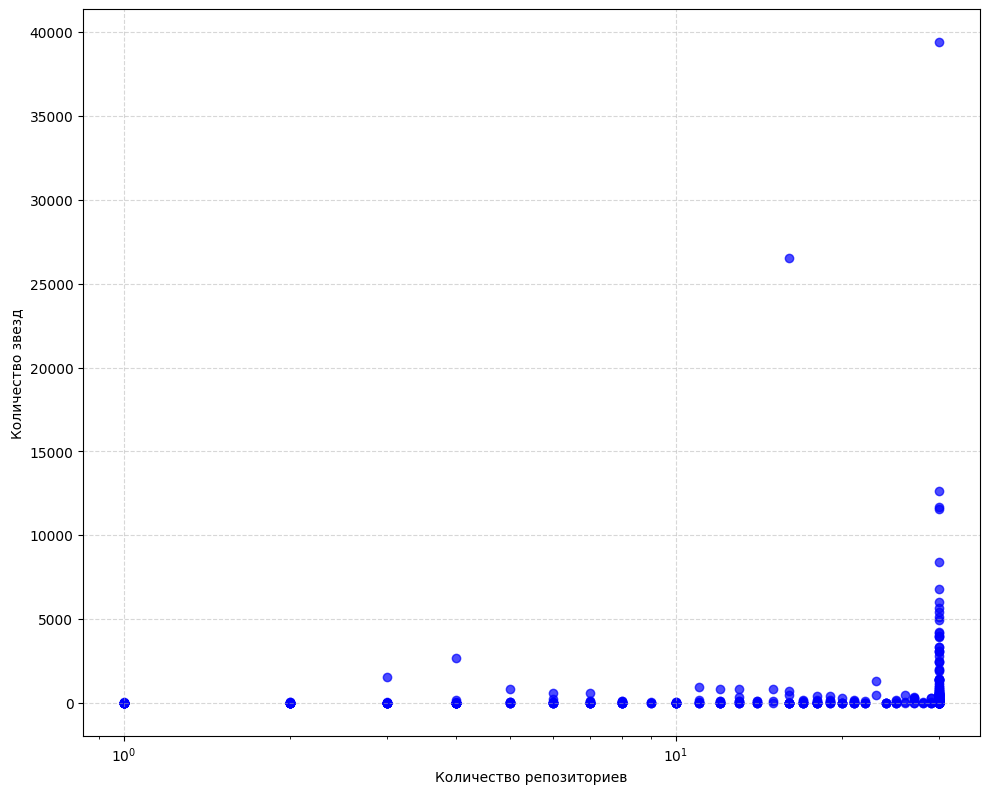

,organization,repo_count,total_stars
432,yujinrobot,30,629
415,udacity,30,5430
413,tryolabs,30,6043
412,trimble-oss,30,392
411,traclabs,30,23
...,...,...,...
217,carbonrobotics,27,15
312,lord-microstrain,27,292
75,Karelics,27,220
82,LORD-MicroStrain,27,292


In [50]:
org_stats = repo_df.groupby('organization').agg(
    repo_count=('organization', 'size'),  
    total_stars=('repo_stars', 'sum')         
).reset_index().sort_values(by='repo_count', ascending=False)

plt.figure(figsize=(10, 8))
plt.scatter(org_stats['repo_count'], org_stats['total_stars'], alpha=0.7, color='blue')
plt.xlabel('Количество репозиториев')
plt.ylabel('Количество звезд')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xscale('log')

plt.show()
org_stats.head(200)

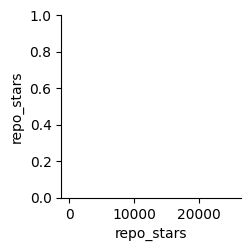

In [55]:
import seaborn as sns
sns.pairplot(repo_df)